In [23]:
import tweepy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textblob import TextBlob
import matplotlib.pyplot as plt
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [24]:
# Memasukkan data dari file CSV
nama_file_csv = 'instagram_bersih.csv'  
df = pd.read_csv(nama_file_csv)

In [25]:
df.drop_duplicates(keep="first", inplace=True)
df

,Unnamed: 0,text_bersih
0,0,Min mau tanya email mari belajar kok ke logout...
1,1,Hi kak rizkymutiara86 benar akun maribelajar s...
2,2,maribelajarid baiklah lalu untuk file2 yang ka...
3,3,rizkymutiara86 hi kak mohon periksa dm kami te...
4,4,Untuk Mahasiswa apakah boleh ikut
...,...,...
1018,1018,Faisulll
1019,1019,fajekrina fajeeeeek ya ampun kangen
1020,1020,faisaldp wkwkwk ikut studi ta magang sul
1021,1021,fajekrina studi aku jek


In [26]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd
import numpy as np

# nltk.download('punkt')
# nltk.download('stopwords')

# Inisialisasi stemmer Sastrawi
stemmer = StemmerFactory().create_stemmer()

# Preprocessing
def preprocessing(docText):
    # Periksa apakah nilai NaN
    if pd.isnull(docText):
        return ''

    # Case folding
    text = docText.lower()

    # Bersihkan Teks
    text = re.sub(r"@[\w]*", "", text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub("rt", "", text)
    text = re.sub("yg", "", text)
    text = text.strip()

    # Tokenisasi
    tokens = word_tokenize(text)

    # Stop Words
    stopWord = set(stopwords.words('indonesian'))
    listWords = []
    for t in tokens:
        if t not in stopWord:
            listWords.append(t)

    # Stemming
    listWordAfterStemp = []
    for te in listWords:
        stemmingText = stemmer.stem(te)
        deleteExceptString = re.sub(r"[^a-z]", "", stemmingText)
        listWordAfterStemp.append(deleteExceptString)

    dataListWords = ' '.join(listWordAfterStemp)
    return dataListWords

# Impor data dari file CSV
nama_file_csv = 'instagram_bersih.csv'  # Ganti dengan nama file CSV Anda
df = pd.read_csv(nama_file_csv)

# Pastikan kolom 'text_bersih' ada dalam DataFrame
if 'text_bersih' in df.columns:
    # Terapkan fungsi preprocessing ke kolom 'text_bersih'
    df['preprocessing_result'] = df['text_bersih'].apply(preprocessing)

    # Tampilkan DataFrame
    print(df)
else:
    print("Kolom 'text_bersih' tidak ditemukan dalam DataFrame.")


      Unnamed: 0                                        text_bersih  \
0              0  Min mau tanya email mari belajar kok ke logout...   
1              1  Hi kak rizkymutiara86 benar akun maribelajar s...   
2              2  maribelajarid baiklah lalu untuk file2 yang ka...   
3              3  rizkymutiara86 hi kak mohon periksa dm kami te...   
4              4                  Untuk Mahasiswa apakah boleh ikut   
...          ...                                                ...   
1018        1018                                           Faisulll   
1019        1019               fajekrina fajeeeeek ya ampun kangen    
1020        1020          faisaldp wkwkwk ikut studi ta magang sul    
1021        1021                            fajekrina studi aku jek   
1022        1022                                     faisaldp oalah   

                                   preprocessing_result  
0     min email mari ajar logout login ngak ya minmo...  
1        hi kak rizkymutiara ak

In [27]:
df.sort_values("preprocessing_result", inplace=True)
df

,Unnamed: 0,text_bersih,preprocessing_result
380,380,NaN,
569,569,NaN,
135,135,NaN,
584,584,NaN,
134,134,NaN,
...,...,...,...
618,618,yusuftaufikhur ADRO BUMI ITMG,yusuftaufikhur adro bumi itmg
398,398,yuulianti amiin mkasi mbaa,yuulianti amiin mkasi mbaa
452,452,zahrinnaz wkwk betul sekali pemirsaa,zahrinnaz wkwk pemirsaa
472,472,zzefanyadw tips nya temenan sama kamu biar ter...,zzefanyadw tips nya temenan biar motivasi


In [28]:
def getPolarity(text):
    analysis = TextBlob(text)
    try:
        analysis = analysis.translate(to="en")
    except Exception as e:
        print(e)
        
    return analysis.sentiment.polarity

df['polarity'] = df['preprocessing_result'].apply(getPolarity)
df

'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attr

,Unnamed: 0,text_bersih,preprocessing_result,polarity
380,380,NaN,,0.0
569,569,NaN,,0.0
135,135,NaN,,0.0
584,584,NaN,,0.0
134,134,NaN,,0.0
...,...,...,...,...
618,618,yusuftaufikhur ADRO BUMI ITMG,yusuftaufikhur adro bumi itmg,0.0
398,398,yuulianti amiin mkasi mbaa,yuulianti amiin mkasi mbaa,0.0
452,452,zahrinnaz wkwk betul sekali pemirsaa,zahrinnaz wkwk pemirsaa,0.0
472,472,zzefanyadw tips nya temenan sama kamu biar ter...,zzefanyadw tips nya temenan biar motivasi,0.0


In [29]:
def getSubjectivity(text):
    analysis = TextBlob(text)
    try:
        analysis = analysis.translate(to="en")
    except Exception as e:
        print(e)
        
    return analysis.sentiment.subjectivity

df['subjectivity'] = df['preprocessing_result'].apply(getSubjectivity)
df

'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attr

,Unnamed: 0,text_bersih,preprocessing_result,polarity,subjectivity
380,380,NaN,,0.0,0.0
569,569,NaN,,0.0,0.0
135,135,NaN,,0.0,0.0
584,584,NaN,,0.0,0.0
134,134,NaN,,0.0,0.0
...,...,...,...,...,...
618,618,yusuftaufikhur ADRO BUMI ITMG,yusuftaufikhur adro bumi itmg,0.0,0.0
398,398,yuulianti amiin mkasi mbaa,yuulianti amiin mkasi mbaa,0.0,0.0
452,452,zahrinnaz wkwk betul sekali pemirsaa,zahrinnaz wkwk pemirsaa,0.0,0.0
472,472,zzefanyadw tips nya temenan sama kamu biar ter...,zzefanyadw tips nya temenan biar motivasi,0.0,0.0


In [39]:
def getClassification(val):
    if val < 0:
        return 'negatif'
    elif val == 0:
        return 'netral'
    else:
        return 'positif'
df['sentimen'] = df['polarity'].apply(getClassification)
df

,Unnamed: 0,text_bersih,preprocessing_result,polarity,subjectivity,sentimen
380,380,NaN,,0.0,0.0,netral
569,569,NaN,,0.0,0.0,netral
135,135,NaN,,0.0,0.0,netral
584,584,NaN,,0.0,0.0,netral
134,134,NaN,,0.0,0.0,netral
...,...,...,...,...,...,...
618,618,yusuftaufikhur ADRO BUMI ITMG,yusuftaufikhur adro bumi itmg,0.0,0.0,netral
398,398,yuulianti amiin mkasi mbaa,yuulianti amiin mkasi mbaa,0.0,0.0,netral
452,452,zahrinnaz wkwk betul sekali pemirsaa,zahrinnaz wkwk pemirsaa,0.0,0.0,netral
472,472,zzefanyadw tips nya temenan sama kamu biar ter...,zzefanyadw tips nya temenan biar motivasi,0.0,0.0,netral


In [40]:
positif = df[df["sentimen"] == 'positif']
negatif = df[df["sentimen"] == 'negatif']
netral = df[df["sentimen"] == 'netral']
print("+ " + str((positif.shape[0]/df.shape[0]) * 100 ) + ' %')
print("- " + str((negatif.shape[0]/df.shape[0]) * 100 ) + ' %')
print("~ " + str((netral.shape[0]/df.shape[0]) * 100 ) + ' %')

+ 3.4213098729227758 %
- 0.8797653958944283 %
~ 95.6989247311828 %


<BarContainer object of 3 artists>

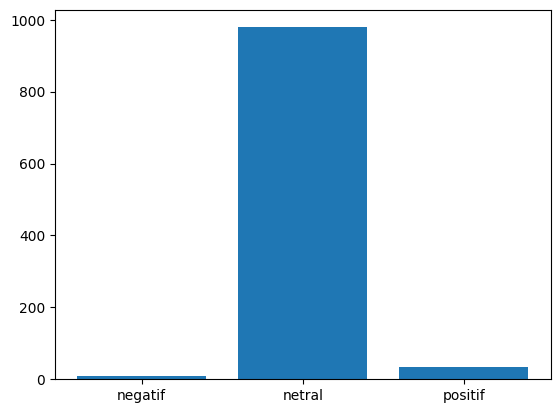

In [41]:
labels = df.groupby('sentimen').count().index.values
values = df.groupby('sentimen').size().values
plt.bar(labels, values)

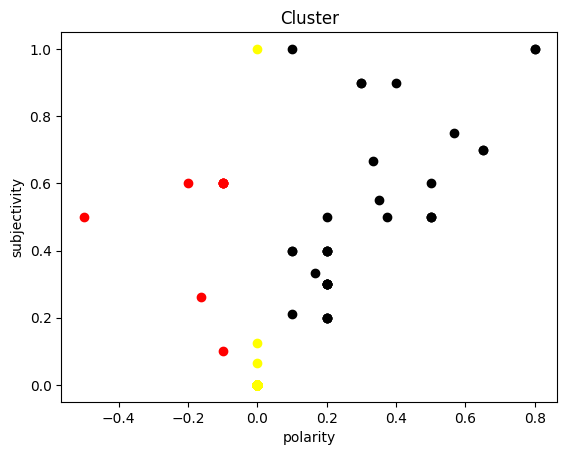

In [43]:
for index, row in df.iterrows():
    if row['sentimen'] == 'positif':
        plt.scatter(row['polarity'], row['subjectivity'], color="black")
    elif row['sentimen'] == 'netral':
        plt.scatter(row['polarity'], row['subjectivity'], color="yellow")
    if row['sentimen'] == 'negatif':
        plt.scatter(row['polarity'], row['subjectivity'], color="red")
    
plt.title('Cluster')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [83]:
from sklearn.cluster import KMeans
# import sys
# from matplotlib import style
# style.use("ggplot")

In [84]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [85]:
# Mengasumsikan 'netral' ada dalam kolom 'preprocessing_result'
df['preprocessing_result'] = df['preprocessing_result'].astype(str)

In [86]:
# Gunakan LabelEncoder untuk mengonversi label string menjadi label numerik
label_encoder = LabelEncoder()
df['preprocessing_result'] = label_encoder.fit_transform(df['preprocessing_result'])

In [87]:
# Pilih kolom-kolom yang relevan untuk clustering
selected_columns = ['preprocessing_result']  # Tambahkan kolom lain jika diperlukan

In [88]:
# Standarisasi data
scaler = StandardScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])

In [89]:
nCluster = 3

In [90]:
# Fitting KMeans
kmeans = KMeans(n_clusters=nCluster, random_state=42)
df['cluster'] = kmeans.fit_predict(df[selected_columns])

c:\Users\patri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [91]:
# Tampilkan DataFrame hasil dengan penugasan cluster
print(df[['preprocessing_result', 'cluster']])

     preprocessing_result  cluster
380             -0.114872        2
569             -0.114872        2
135             -0.114872        2
584             -0.114872        2
134             -0.114872        2
..                    ...      ...
618              1.749734        0
398              1.753404        0
452              1.757075        0
472              1.760745        0
738              1.764416        0

[1023 rows x 2 columns]


In [92]:
# Simpan DataFrame ke dalam file CSV
df.to_csv('hasil_clustering_ig.csv', index=False)
